<a href="https://colab.research.google.com/github/fillerInk/colab_notebooks/blob/master/Python_Matrices_and__Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1j2OQYcv6HsvBu0BxiKsy8TSOZQonuASf


In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1j2OQYcv6HsvBu0BxiKsy8TSOZQonuASf
title Sample file.txt, id 1cj7LWvrS0yuAhJEGSPdcKwHzzQKjMVT5
title Sample file.txt, id 1GPxsR-IVV5fNMVe6-HbBGfBOntbvgfnF
title Sample file.txt, id 1SyfQdeXb9sXEpUG3CN2BGJatSd0isrVa
title Sample file.txt, id 13e1WhUzYQxySHwtGNjQfGnt4wQ4iHmsE
title Sample file.txt, id 1jdhYSoa91__BRL_jgEgenfknhxAgkfxV
title Sample file.txt, id 1RiLqf-S0cetqXOU04TUT-04KIMQomfIx


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1qN1O8pq2KNL6Lmk7HXyd_9uSAYho7CVi' # https://drive.google.com/open?id=1qN1O8pq2KNL6Lmk7HXyd_9uSAYho7CVi
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,12,55,155.0,250,1.3,10.5,5,2.0,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.0,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
0,1,55,132.0,300,1.3,10.6,5,0.3,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.0,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
0,9,55,142.0,329,1.5,8.5,5,2.0,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
0,8,55,152.0,385,1.3,8.0,5,2.0,3,5.0,15,3,0,0,147.5,26,3,5799,19

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [0]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


In [0]:
import pandas as pd


In [0]:
df = pd.read_csv('mobile_cleaned_local.csv')

In [0]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
df.tail()


,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [0]:
dir(df)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloord

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
len(df)

109

In [0]:
df.shape

(109, 40)

In [0]:
df.loc[2]

sim_type                                0.00
aperture                                9.00
gpu_rank                               55.00
weight                                142.00
stand_by_time                         329.00
processor_frequency                     1.50
thickness                               8.50
flash_type                              5.00
front_camera_resolution                 2.00
auto_focus                              3.00
screen_size                             5.00
frames_per_second                      30.00
FM                                      2.00
no_of_reviews_in_gsmarena_in_week      20.00
os                                      0.00
phone_height                          145.50
screen_protection                       4.00
sim_size                                3.00
price                                4777.00
talk_time                              10.00
video_resolution                     1080.00
display_resolution                      4.00
removable_

In [0]:
df_short = df[23:25]

In [0]:
df_short.head()


,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
23,3,1,43,97.0,345,1.2,5.1,5,5.0,3,...,2,10,2,68.1,0.0,5,3,2000,94,1
24,0,10,29,150.0,322,1.5,8.2,5,5.0,3,...,6,23,6,71.0,32.0,6,4,2750,21,1


In [0]:
df_short.shape

(2, 40)

In [0]:
df_thin = df[['stand_by_time','price','is_liked']]

In [0]:
df_thin.head

<bound method NDFrame.head of      stand_by_time  price  is_liked
0              250   3870         1
1              300   4059         1
2              329   4777         0
3              385   5799         1
4              385   5990         0
5              280   5999         0
6              230   5999         1
7              182   6599         1
8              182   6599         1
9              435   6649         1
10             514   6749         1
11             300   6990         0
12             280   6999         1
13             198   6999         1
14             200   6999         1
15             680   6999         1
16             576   7340         1
17             264   7499         1
18             180   7590         1
19             160   7790         1
20             450   7899         1
21             264   7914         1
22             354   7999         0
23             345   8490         1
24             322   8499         1
25             914   8999         

In [0]:
df_thin.head()

,stand_by_time,price,is_liked
0,250,3870,1
1,300,4059,1
2,329,4777,0
3,385,5799,1
4,385,5990,0


In [0]:
df_lowprice = df_thin[df_thin['price'] < 5000]

In [0]:
df_lowprice.head()

,stand_by_time,price,is_liked
0,250,3870,1
1,300,4059,1
2,329,4777,0


In [0]:
df_lowprice.describe()

,stand_by_time,price,is_liked
count,3.000000,3.000000,3.000000
mean,293.000000,4235.333333,0.666667
std,39.962482,478.520985,0.577350
min,250.000000,3870.000000,0.000000
25%,275.000000,3964.500000,0.500000
50%,300.000000,4059.000000,1.000000
75%,314.500000,4418.000000,1.000000
max,329.000000,4777.000000,1.000000


In [0]:
df_thin[df_thin['is_liked']==1]['price'].mean()


19393.239130434784

In [0]:
g = df_thin.groupby('is_liked')

In [0]:
for key,lowkey in g:
  print(key)
  print(lowkey)

0
     stand_by_time  price  is_liked
2              329   4777         0
4              385   5990         0
5              280   5999         0
11             300   6990         0
22             354   7999         0
38             490   9999         0
53             345  14300         0
60             840  15689         0
74             390  21999         0
77             620  22999         0
78             618  24499         0
80             598  24999         0
83             504  25500         0
90             500  34999         0
91             240  34999         0
95             580  37766         0
108            400  27999         0
1
     stand_by_time  price  is_liked
0              250   3870         1
1              300   4059         1
3              385   5799         1
6              230   5999         1
7              182   6599         1
8              182   6599         1
9              435   6649         1
10             514   6749         1
12             280   699

In [0]:
df_thin.groupby(['is_liked']).mean()

,stand_by_time,price
is_liked,,
0,457.235294,19264.823529
1,394.945652,19393.239130


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

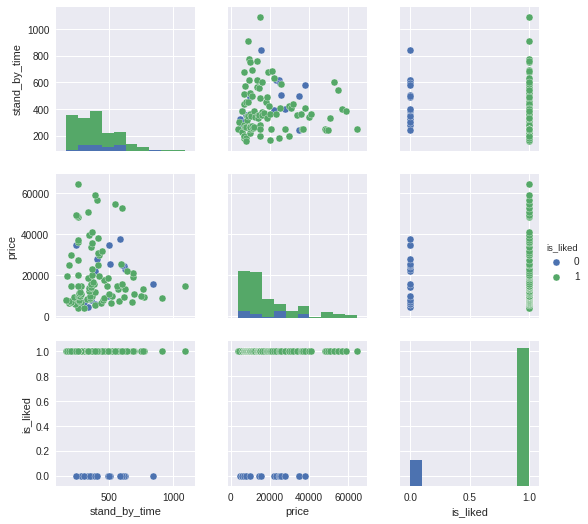

In [0]:
ax = sns.pairplot(df_thin,diag_kind='hist' ,hue='is_liked')

In [0]:
print("hello world")

hello world
